<a href="https://colab.research.google.com/github/sefahw/machine-learning-assignment/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
class ScratchDecesionTreeClassifierDepth1():
    """
    Scratch Implementation of a Decision Tree Classifier with Depth 1
    Parameters
    ----------
    verbose : bool
      True if you want to output the learning process.
    """
    
    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
    
    def _gini(self,X):
        """
        Calculating Gini Impurity
        Parameters
        ----------
        X : ndarray, shape (n_samples,) of the following form
            Label value of training data
        """
        unique,count = np.unique(X,return_counts=True)
        tmp = 0
        
        for i in unique:
            tmp += (count[unique==i]/np.sum(count))**2
        
        return 1-tmp
        
    def fit(self, X, y):
        """
        Train a decision tree classifier.
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features) of the following form
            Features of training data
        y : ndarray, shape (n_samples, ) of the following form
            Correct answer value of training data
        """
        
        feature_num = X.shape[1]
        
        self.gain = 0
        for i in range(feature_num):
            self.threshold = np.unique(X[:,i])
            
            for j in self.threshold[1:]:
                l = y[X[:,i] < j]
                r = y[X[:,i] >=j]
                
                gini_l = len(l)/(len(l)+len(r))*self._gini(l)
                gini_r = len(r)/(len(l)+len(r))*self._gini(r)
                
                tmp = self._gini(y) -gini_l -gini_r
                
                if tmp > self.gain:
                    self.l_label = statistics.mode(l)
                    self.r_label = statistics.mode(r)
                    self.feature = i
                    self.threshold = j
                    self.gain = tmp
                    
                    #When verbose is set to true, output the learning process.
                    if self.verbose:
                        print('feature',self.feature,
                              'threshold',self.threshold,
                              'gain',self.gain)
            
    def predict(self, X):
        """
        Estimate labels using a decision tree classifier.
        """
        
        return np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)

In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X,y,model,step=0.01,
                    title='decision region',
                    xlabel='xlabel',
                    ylabel='ylabel',
                    target_names=['versicolor', 'virginica']):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [4]:
X=np.array([0,2,1,-1,4])
y=np.array([0,0,0,1,1])

threshold_value=np.unique(X)
print('threshold_value',threshold_value)

threshold_value [-1  0  1  2  4]


In [5]:
u,counts=np.unique(y,return_counts=True)
print('unique',u,'unique_counts',counts)


unique [0 1] unique_counts [3 2]


In [6]:
def _gini(X):
    unique,count= np.unique(X, return_counts=True)
    tmp=0
    for i in unique:
        tmp+=(count[unique==i]/np.sum(count))**2
    return 1-tmp

In [7]:
for i in threshold_value[1:]:
               c1=y[X <i]
               c2=y[X >=i]


               print(i,'c1',c1,'c2',c2)
               print(i,'gini_left:',_gini(c1),'gini_right:',_gini(c2))

0 c1 [1] c2 [0 0 0 1]
0 gini_left: [0.] gini_right: [0.375]
1 c1 [0 1] c2 [0 0 1]
1 gini_left: [0.5] gini_right: [0.44444444]
2 c1 [0 0 1] c2 [0 1]
2 gini_left: [0.44444444] gini_right: [0.5]
4 c1 [0 0 0 1] c2 [1]
4 gini_left: [0.375] gini_right: [0.]


In [8]:
for i in threshold_value[1:]:
               c1=y[X <i]
               c2=y[X >=i]
               left=len(c1)/(len(c1)+len(c2))*_gini(c1)
               right=len(c2)/(len(c1)+len(c2))*_gini(c2)
               gain=_gini(X)-left-right
               print(i,gain)


0 [0.5]
1 [0.33333333]
2 [0.33333333]
4 [0.5]


In [9]:
X=np.array([[-0.44699,-2.807],[-1.4621,-2.4586],
            [0.10645,1.9242],[-3.5944,-4.0112],
            [0.9888,4.5718],[-3.1625,-3.9606],
            [0.56421,0.72888],[-0.60216,8.4636],
            [-0.61251,-0.75345],[-0.73535,-2.2718],
            [-0.80647,-2.2135],[0.86291,2.5946],
            [-3.11108,0.15394],[-2.9362,2.5462],
            [-0.57242,-2.9915],[1.4771,3.4896],
            [-0.58619,0.37158],[0.6017,4.3439],
            [-2.1086,8.3428],[-410113,-4.353],
            [-1.9948,-1.3927],[0.35084,-0.031994],
            [0.96765,7.8929],[-1.281,15.6824],
            [0.96765,10.083],[1.3763,1.3347],
            [-2.3234,-2.5323],[-2.9452,-1.8219],
            [0.14654,-0.28733],[0.5461,5.8245],
            [-0.65259,9.3444],[0.59912,5.3524],
            [0.50214,-0.31818],[-3.0603,-3.6461],
            [-6.6797,0.67661],[-2.353,-0.72261],
            [1.1319,2.4023],[-0.12243,9.0162],
            [-2.5677,13.1779],[0.057313,5.4681]
            ])
y=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

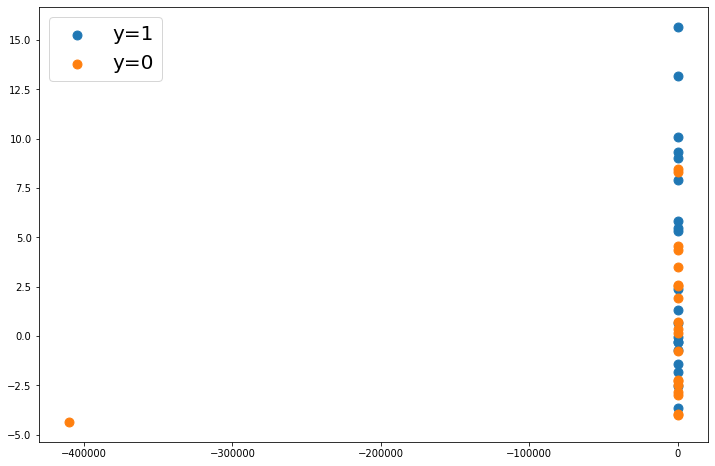

In [10]:
fig=plt.subplots(figsize=(12,8))
plt.rcParams["font.size"]=20
plt.scatter(X[y==1,0] ,X[y==1,1],s=80,label='y=1')
plt.scatter(X[y==0,0] ,X[y==0,1],s=80,label='y=0')
plt.legend();

In [11]:
from sklearn.model_selection  import train_test_split
X_train,X_valid,y_train,y_valid=\
train_test_split(X,y,train_size=0.8,random_state=None)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(32, 2)
(32,)
(8, 2)
(8,)


In [12]:
clf1 = ScratchDecesionTreeClassifierDepth1(verbose=True)

clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_valid)
  

feature 0 threshold -3.0603 gain [0.02041331]
feature 0 threshold -0.12243 gain [0.03583829]
feature 1 threshold -2.2135 gain [0.04290179]
feature 1 threshold -1.8219 gain [0.06510417]


In [13]:
from sklearn.tree import DecisionTreeClassifier 


clf2 =DecisionTreeClassifier(max_depth=1)

clf2.fit(X_train,y_train)

y_pred2=clf2.predict(X_valid)


In [14]:
y_pred=clf2.predict(X_valid)

In [15]:
print(y_pred)
print(X_valid)

[0 1 1 1 1 0 1 1]
[[-3.1625  -3.9606 ]
 [ 0.96765 10.083  ]
 [-3.11108  0.15394]
 [-0.58619  0.37158]
 [ 0.10645  1.9242 ]
 [-3.5944  -4.0112 ]
 [ 0.9888   4.5718 ]
 [-6.6797   0.67661]]


In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import f1_score
accuracy=accuracy_score(y_valid,y_pred)
precision=precision_score(y_valid,y_pred)
recall=recall_score(y_valid,y_pred)
f1=f1_score(y_valid,y_pred)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.5
precision 0.3333333333333333
recall 1.0
f1 0.5


In [ ]:

fit,ax=plt.subplots(figsize=(12,12))
plt.rcParams["font.size"]=20
decision_region(X_train,y_train,clf1,target_names=['0','1'],title='TRAIN')

In [ ]:
print(y_pred)
print(y_valid)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import f1_score
accuracy=accuracy_score(y_valid,y_pred)
precision=precision_score(y_valid,y_pred)
recall=recall_score(y_valid,y_pred)
f1=f1_score(y_valid,y_pred)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

In [ ]:
fit,ax=plt.subplots(figsize=(12,12))
plt.rcParams["font.size"]=20
decision_region(X_train,y_train,clf2,target_names=['0','1'],title='TRAIN')

In [ ]:
X_train,X_valid, y_train,y_valid=\
train_test_split(X,y,train_size=0.8,random_state=None)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

In [ ]:
from numpy.lib import unique
class Node():
      def __init__(self,max_depth=None,verbose=False):
        self.verbose=verbose
        self.max_depth=max_depth
        self.feature=None
      def _separate(self,X,y,depth):
        self.depth=depth
        features=X.shape[1]
        if len(np.unique(y))==1:
           self.label=np.unique(y)[0]
           return
        if self.depth==self.max_depth:
           self.label=statistics.mode(y)
           return
        self.gain=0 
        for feature_number in range(features):
            threshold=np.unique(X[:,feature_number])
            for threshold_value in threshold[1:]:
                l=y[X[:,feature_number]<threshold_value]
                r=y[X[:,feature_number]>=threshold_value]


                gini_l = len(l)/(len(l)+len(r))*self._gini(l)
                gini_r = len(r)/(len(l)+len(r))*self._gini(r)

                gain_tmp = self._gini(y) -gini_l -gini_r

                
                if gain_tmp > self.gain:
                    self.feature = feature_number
                    self.threshold = threshold_value
                    self.gain=gain_tmp
        if self.verbose:
           print('depth',self.depth,
                    'feature',self.feature,
                   'threshold',self.threshold,
                      'gain',self.gain)
        l_X=X[X[:,self.feature]<self.threshold]
        l_y=y[X[:,self.feature]<self.threshold]
        self.left=Node(self.max_depth,self.verbose)
        self.left._separate(l_X,l_y,depth+1)

        r_X=X[X[:,self.feature]>=self.threshold]
        r_y=y[X[:,self.feature]>=self.threshold]
        self.right=Node(self.max_depth,self.verbose)
        self.right._separate(r_X,r_y,depth+1)
      def _gini(self,X):
        unique,count=np.unique(X,return_counts=True)

        impure=0
        for i in unique:
            impure+=(count[unique==i]/np.sum(count))**2
        return 1-impure
      def _predict(self,X):
        if self.feature==None or self.depth==self.max_depth:
           return self.label
        else:
          if X[self.feature]<self.threshold:
            return self.left._predict(X)
          else:
             return self.right._predict(X)

                    





In [ ]:
class ScratchDecisionTreeClassifier():
      def __init__(self,max_depth=1,verbose=False):
        self.verbose=verbose
        self.max_depth=max_depth
      def fit(self, X, y):
          self.depth=0
          self.root=Node(self.max_depth,self.verbose)
          self.root._separate(X,y,self.depth)
      def predict(self,X):
          y_pred=np.zeros(len(X))
          for i,x in enumerate(X):
              y_pred[i]= self.root._predict(x)
          return y_pred    

In [ ]:
clf3=ScratchDecisionTreeClassifier(max_depth=2,verbose=False)
clf3.fit(X_train,y_train)

y_pred3=clf3.predict(X_valid)
 

print(y_pred3)

In [ ]:
fit,ax=plt.subplots(figsize=(12,12))
plt.rcParams["font.size"]=20
decision_region(X_train,y_train,clf3,target_names=['0','1'],title='TRAIN')

In [ ]:
clf5=ScratchDecisionTreeClassifier(max_depth=None,verbose=False)
clf5.fit(X_train,y_train)

y_pred5=clf5.predict(X_valid)
 

print(y_pred5)

In [ ]:
accuracy=accuracy_score(y_valid,y_pred5)
precision=precision_score(y_valid,y_pred5)
recall=recall_score(y_valid,y_pred5)
f1=f1_score(y_valid,y_pred5)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

In [ ]:
fit,ax=plt.subplots(figsize=(12,12))
plt.rcParams["font.size"]=20
decision_region(X_train,y_train,clf5,target_names=['0','1'],title='TRAIN')

In [ ]:
clf_sk=ScratchDecisionTreeClassifier(max_depth=None,verbose=False)
clf_sk.fit(X_train,y_train)

fit,ax=plt.subplots(figsize=(12,12))
plt.rcParams["font.size"]=20
decision_region(X_train,y_train,clf_sk,target_names=['0','1'],title='TRAIN')

In [ ]:
class Test():
    def _init_(self,max_depth,lr=None):
        self.max_depth=max_depth
        self.lr=lr
    def seperate(self,depth):
        self.depth
        print('depth',self.depth,'Node',self.lr)
        